In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv(r'C:\Users\Rachana Sanda\Desktop\archive (1)\train_data.csv', low_memory=False)
print(df1)

       Unnamed: 0  Sentence_id  \
0               0  GERRES15609   
1               1  PHERES15784   
2               2  GERREQ10457   
3               3  GERSKL27235   
4               4  HONSSK18415   
...           ...          ...   
60110       60110  UAERES18030   
60111       60111   GERRES3026   
60112       60112   INDSSK5492   
60113       60113  PHESSK15092   
60114       60114   HONEDU1643   

                                            New_Sentence            Type  
0      Author and/or Review architecture/design and o...  Responsibility  
1      Should be able to develop custom dynamic shape...  Responsibility  
2      Experience in working crosslly with a  larger ...     Requirement  
3      Previous business experience, including but no...           Skill  
4             Delivering fast and right the first  time.       SoftSkill  
...                                                  ...             ...  
60110  In this position, you will  utilize your progr...  Responsi

In [3]:
df1.head(8)

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
5,5,INDRES9494,Track department expenses and capital budget .,Responsibility
6,6,HONRES51852,Meet performance metrics.,Responsibility
7,7,UAEREQ34683,YOU MUST HAVEBachelors degree in Engineering.,Requirement


In [4]:
df2 = pd.read_csv(r'C:\Users\Rachana Sanda\Desktop\archive (1)\test_data.csv', low_memory=False)
df2.head(8)

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."
5,5,INDRES5908,Assure compliance and recommend actions to imp...
6,6,UAESKL39669,WE VALUEKnowledge of purchasing system (Oracl...
7,7,HONSSK10706,Lead a global finance team in driving financia...


In [5]:
#Merging the files (training and test data set)
df_m = pd.merge(df1, df2, how='outer')
df_m

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
75139,15024,HONEXP17084,A minimum of 3 years of experience in Industri...,NaN
75140,15025,UAESSK45553,Track record of managing multiple projects wit...,NaN
75141,15026,GERSSK14317,"In addition, the candidate should have effecti...",NaN
75142,15027,PHEREQ4980,Candidate should have sufficient knowledge on ...,NaN


<AxesSubplot:>

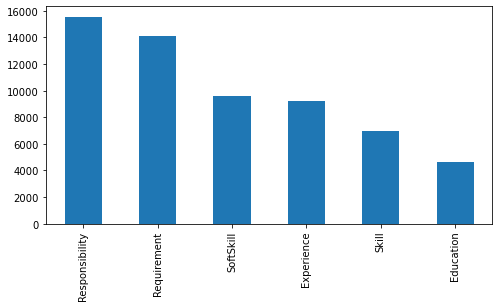

In [7]:
#Data Visualization
df_m = df_m[['New_Sentence','Type']]
df_m.Type.value_counts().plot.bar(figsize = (8,4))


In [8]:
#Identify missing values
df_m.isna().sum()

New_Sentence     1394
Type            15029
dtype: int64

In [9]:
#Now that we know the length of the dataset (len(df)), 
#we can calculate the proportion of missing values for each column by simply multiplying the previous result by 100.
df_m.isna().sum()/len(df_m)*100

New_Sentence     1.855105
Type            20.000266
dtype: float64

In [10]:
#dropping rows with null values
df_m = df_m.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)
df_m.head()             

,New_Sentence,Type
0,Author and/or Review architecture/design and o...,Responsibility
1,Should be able to develop custom dynamic shape...,Responsibility
2,Experience in working crosslly with a larger ...,Requirement
3,"Previous business experience, including but no...",Skill
4,Delivering fast and right the first time.,SoftSkill


In [11]:
#Converting all the characters in the dataset to lower case
df_m['New_Sentence'] = df_m['New_Sentence'].str.lower()

In [12]:
#remove punctualtions : remove characters other than alphanumeric ones
import re
df_m['New_Sentence'] = df_m['New_Sentence'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))
df_m.head(10)

,New_Sentence,Type
0,author and or review architecture design and o...,Responsibility
1,should be able to develop custom dynamic shape...,Responsibility
2,experience in working crosslly with a larger ...,Requirement
3,previous business experience including but no...,Skill
4,delivering fast and right the first time,SoftSkill
5,track department expenses and capital budget,Responsibility
6,meet performance metrics,Responsibility
7,you must havebachelors degree in engineering,Requirement
8,after covid 19 ability to travel to manufactu...,Requirement
9,six sigma qualification to at least green bel...,Education


In [13]:
from nltk.corpus import stopwords
def SP(New_Sentence):
    New_Sentence = " ".join([word for word in str(New_Sentence).split() if word not in set(stopwords.words('english'))])
    return New_Sentence
df_m['New_Sentence1'] = df_m['New_Sentence'].apply(SP)
df_m.head()

,New_Sentence,Type,New_Sentence1
0,author and or review architecture design and o...,Responsibility,author review architecture design technical do...
1,should be able to develop custom dynamic shape...,Responsibility,able develop custom dynamic shape object scrip...
2,experience in working crosslly with a larger ...,Requirement,experience working crosslly larger engineering...
3,previous business experience including but no...,Skill,previous business experience including limited...
4,delivering fast and right the first time,SoftSkill,delivering fast right first time


In [16]:
mapper = {}

for i,cat in enumerate(df_m["Type"].unique()):
        mapper[cat] = i

df_m["category_target"] = df_m["Type"].map(mapper)


In [24]:
#Calculating probability of each class
pi = {}
All = df_m["category_target"].value_counts().sum()
for i, cat in enumerate (df_m["category_target"].value_counts(sort = False)):
    pi[i] = cat / All

print("Probability of each class:")
print("\n".join("{}: {}".format(k, v) for k, v in pi.items()))

Probability of each class:
0: 0.2585844547642453
1: 0.23521236568251924
2: 0.11580963357174333
3: 0.1595878105826921
4: 0.07694654418494289
5: 0.15385919121385716


In [25]:
from collections import Counter
count = Counter()
for headline in df_m["New_Sentence1"].to_numpy():
    for word in headline.split():
        count[word] += 1
        
count.most_common(10)

[('experience', 16175),
 ('years', 8165),
 ('skills', 5266),
 ('ability', 4879),
 ('business', 4833),
 ('management', 4831),
 ('engineering', 4347),
 ('degree', 3743),
 ('work', 3687),
 ('knowledge', 3539)]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
X_train_matrix = vect.fit_transform(df_m["New_Sentence"]) 

In [26]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_m, target = 'Type', train_size=0.8, valid_size=0.1, test_size=0.1)

In [27]:
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)
print("shape of input - validating set", X_valid.shape)
print("shape of output - validating set", y_valid.shape)

shape of input - training set (47201, 3)
shape of output - training set (47201,)
shape of input - testing set (5901, 3)
shape of output - testing set (5901,)
shape of input - validating set (5900, 3)
shape of output - validating set (5900,)


In [29]:
vect = CountVectorizer(stop_words = 'english')
X_train_matrix = vect.fit_transform(df_m["New_Sentence"]) 

In [31]:
docIdx, wordIdx = X_train_matrix.nonzero()
count = X_train_matrix.data


In [32]:
classIdx = []

for idx in docIdx:
        
    classIdx.append(df_m["category_target"].iloc[idx])


In [33]:
dfr = pd.DataFrame()
dfr["docIdx"] = np.array(docIdx)
dfr["wordIdx"] = np.array(wordIdx)
dfr["count"] = np.array(count)
dfr["classIdx"] = np.array(classIdx)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481581 entries, 0 to 481580
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   docIdx    481581 non-null  int32
 1   wordIdx   481581 non-null  int32
 2   count     481581 non-null  int64
 3   classIdx  481581 non-null  int64
dtypes: int32(2), int64(2)
memory usage: 11.0 MB


In [34]:
dfr.head()

,docIdx,wordIdx,count,classIdx
0,0,1973,1,0
1,0,16354,1,0
2,0,1576,1,0
3,0,5222,1,0
4,0,18639,1,0


In [35]:
#Alpha value for smoothing
a = 0.001
#Calculate probability of each word based on class
pb_ij = dfr.groupby(['classIdx','wordIdx'])
pb_j = dfr.groupby(['classIdx'])
Pr =  (pb_ij['count'].sum() + a) / (pb_j['count'].sum() + len(vect.vocabulary_))    
#Unstack series
Pr = Pr.unstack()



#Replace NaN or columns with 0 as word count with a/(count+|V|+1)
for c in range(0,6):
    Pr.loc[c,:] = Pr.loc[c,:].fillna(a/(pb_j['count'].sum()[c] + 16689))



#Convert to dictionary for greater speed
Pr_dict = Pr.to_dict()



Pr

wordIdx,0,1,2,3,4,5,6,7,8,9,...,20974,20975,20976,20977,20978,20979,20980,20981,20982,20983
classIdx,,,,,,,,,,,,,,,,,,,,,
0,5.581634e-09,2.180928e-05,5.581634e-09,5.581634e-09,5.456409e-06,5.581634e-09,5.581634e-09,5.581634e-09,5.581634e-09,5.581634e-09,...,5.581634e-09,5.581634e-09,5.581634e-09,5.456409e-06,5.581634e-09,5.456409e-06,5.581634e-09,5.581634e-09,5.581634e-09,5.581634e-09
1,1.522738e-05,1.522738e-05,7.617497e-06,7.867016e-09,7.617497e-06,7.867016e-09,7.867016e-09,7.867016e-09,7.617497e-06,7.867016e-09,...,7.867016e-09,7.867016e-09,7.867016e-09,7.867016e-09,7.867016e-09,7.867016e-09,7.867016e-09,7.867016e-09,7.617497e-06,7.867016e-09
2,1.473448e-08,1.387137e-05,1.473448e-08,1.473448e-08,1.387137e-05,1.473448e-08,1.387137e-05,1.473448e-08,1.473448e-08,1.473448e-08,...,1.473448e-08,1.387137e-05,1.473448e-08,1.473448e-08,1.473448e-08,1.473448e-08,1.473448e-08,1.387137e-05,1.473448e-08,1.387137e-05
3,1.262515e-08,1.262515e-08,1.262515e-08,1.198774e-05,1.262515e-08,1.262515e-08,1.262515e-08,1.262515e-08,1.262515e-08,1.262515e-08,...,1.198774e-05,1.262515e-08,2.396350e-05,1.262515e-08,1.198774e-05,1.262515e-08,1.198774e-05,1.262515e-08,1.262515e-08,1.262515e-08
4,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,1.850893e-05,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,...,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08,2.008556e-08
5,1.006208e-08,2.894539e-05,1.006208e-08,1.006208e-08,1.006208e-08,1.930014e-05,1.006208e-08,9.654893e-06,1.006208e-08,1.930014e-05,...,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08,1.006208e-08


In [36]:
tot = len(dfr['docIdx'].unique()) 
pb_ij = dfr.groupby(['wordIdx']) 
def MNB(df_m, smooth = False):
    #Using dictionaries for greater speed
    df_dict = dfr.to_dict()
    new_dict = {}
    prediction = [] 
    
    #new_dict = {docIdx : {wordIdx: count},....}
    for idx in range(len(df_dict['docIdx'])):
        docIdx = df_dict['docIdx'][idx]
        wordIdx = df_dict['wordIdx'][idx]
        count = df_dict['count'][idx]
        try:
            new_dict[docIdx][wordIdx] = count 
        except:
            new_dict[df_dict['docIdx'][idx]] = {}
            new_dict[docIdx][wordIdx] = count
            
    #Calculating the scores for each doc
    for docIdx in range(1, len(new_dict)+1):
        score_dict = {}
        #Creating a probability row for each class
        for classIdx in range(1,6):
            score_dict[classIdx] = 1
            for wordIdx in new_dict[wordIdx]:
                if smooth: 
                    try:
                        probability=Pr_dict[wordIdx][classIdx]         
                        power = np.log(1+ new_dict[docIdx][wordIdx])                            
                    except:
                        score_dict[classIdx] += 0                        
                else: 
                    try:
                        probability = Pr_dict[wordIdx][classIdx]        
                        power = new_dict[docIdx][wordIdx]               
                        score_dict[classIdx]+=power*np.log(
                                           probability) 
                       
                    except:
                        #Missing V will have 0*log(a/16689) = 0
                        score_dict[classIdx] += 0   
            #Multiply final with pi 
            score_dict[classIdx] +=  np.log(pi[classIdx])   
        #Get class with max probabilty for the given docIdx 
        max_score = max(score_dict, key=score_dict.get)
        prediction.append(max_score)
    return prediction



In [37]:
regular_predict = MNB(dfr, smooth=False)
smooth_predict  = MNB(dfr, smooth=True)
train_label= df_m['category_target'].tolist()
total = len(train_label) 
models = [regular_predict, smooth_predict] 
strings = ['Regular', 'Smoothing'] 
 
for m,s in zip(models,strings):
    val = 0
    for i,j in zip(m, train_label):
        if i == j:
            val +=1
        else:
            pass   
    print(s,"Accuracy Rate:\t\t",int(val/total * 100), "%")

Regular Accuracy Rate:		 22 %
Smoothing Accuracy Rate:		 23 %
